
# Méthodes non paramétriques


L'objectif de cet exercice est de mettre en pratique les notions d'estimation de densité de probabilité et de classification utilisant des modèles non paramétriques.

Soit ${\bf x}_0$ un vecteur de caractéristiques et ${\cal D}({\bf x}_0)$ un domaine comprenant ce vecteur ${\bf x}_0$, nous voulons construire un estimateur $\hat{P}({\bf x}_0|c)$ :
$$
\hat{P}({\bf x}_0|c) \approx \cfrac{\frac{k}{n}}{V({\cal D}({\bf x}_0))}
$$
$k$ est le nombre d'échantillons qui appartiennent au domaine ${\cal D}$ et $n$ est le nombre total d'échantillons.
Comme nous l'avons vu en classe, il existe deux principales catégories d'approches de modélisation non paramétriques :
+  lier $V({\cal D}_n({\bf x}_0))$ à n : il s'agit des modèles basés sur des noyaux (Kernel Density Estimation également appelés fenêtres de Parzen)
+ lier $k_n$ en fonction de $n$ et ajuster le domaine  $V({\cal D}_n({\bf x}_0))$ de manière à ce que $k$ échantillons appartiennent à ${\cal D}_n({\bf x}_0)$ : c'est la méthode des $k$ plus proches voisins (KNN)



# 2. Estimation par KNN


## 2.a)  Estimation de distribution par KNN


L'estimateur de densité de probabilité par KNN est calculé par la fonction suivante : 
$$
\hat{P}({\bf x}_0|\class)=\cfrac{\cfrac{k_n}{n}}{V[{\cal D}({\bf x}_0,\alpha)]}
$$
avec $k_n$ : nombre d'échantillons dans le domaine ${\cal D}$, $n$ nombre total d'échantillons et $\alpha$ un facteur d'échelle. L'idée principale du modèle KNN est d'ajuster $\alpha$ de manière à inclure $k_n$ échantillons
dans le domaine ${\cal D}$.


### A Faire
+ Complétez le code ci-dessous qui charge les datasets, calcule les caractéristiques, applique la méthode KNN et affiche la densité. L'option `n_neighbors=x` définit le nombre de voisins $k_n$. Utilisez $k_n=1$,
+ Changez $k_n$ pour 2, 4 puis 6 et comparez la fonction de densité de probabilité correspondante. 

In [1]:
#import des bibliothèques python nécessaires :
import numpy as np

#plot
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Pour avoir un plot 3D interactif
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D

# Gaussienne et KNN
from scipy.stats import multivariate_normal
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

# pour manipuler les accès aux répertoires
import os

# Pour le traitement d'images et la vision par ordinateur
import cv2

In [67]:
# Choix du dataset
training_images_path ='images/dataset2/app/'
testing_images_path ='images/dataset2/test/'

In [71]:
# Fonction d'extraction de caractéristiques d'une image
def getfeature(filename):
    im = cv2.imread(filename)
    imrgb = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
    R = imrgb[:,:,0]
    G = imrgb[:,:,1]
    B = imrgb[:,:,2]    
    In= R+G+B # Calcul de l'intensité des pixels
    mIn = np.max((In.flatten())) # Calcul de l'intensité maximale
    # normalisation
    Rn = R/mIn
    Gn = G/mIn
    Bn = B/mIn    
    # Calcul de la moyenne de chaque composante
    X = [np.mean(Rn.flatten()),np.mean(Gn.flatten()),np.mean(Bn.flatten())]    
    return X

# Fonction d'extraction de caractéristiques pour toutes les images d'un répertoire de la classe cl
def getfeatures (path, cl):
    X = []
    scl = 'c'+str(cl)
    for i in os.listdir(path):
        #print("processing file ",i)
        if os.path.isfile(os.path.join(path,i)) and scl in i:
            X.append(getfeature(path+i))
    print("Calcul des caractéristiques de la classe", cl, "terminé")
    return np.asarray(X)

### Récupérer les caractéristiques pour les **2 classes**

In [72]:
# COMPLETER

X1 = getfeatures(training_images_path, 1)[:,1:]
X2 = getfeatures(training_images_path, 2)[:,1:]

# Calcul des caractéristiques pour les images de la base de test :
Xtest1 = getfeatures(testing_images_path, 1)[:,1:]
Xtest2 = getfeatures(testing_images_path, 2)[:,1:]


Calcul des caractéristiques de la classe 1 terminé
Calcul des caractéristiques de la classe 2 terminé
Calcul des caractéristiques de la classe 1 terminé
Calcul des caractéristiques de la classe 2 terminé


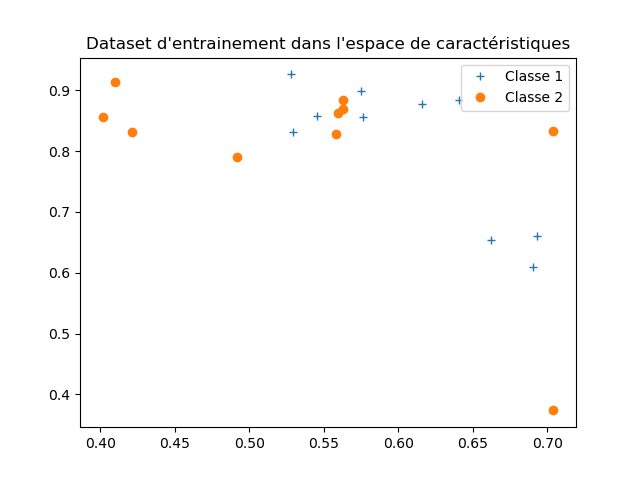

In [73]:
# Affichage des données dans l'espace des caractéristiques
plt.figure()
plt.plot(X1[:,0],X1[:,1],'+',label='Classe 1')
plt.plot(X2[:,0],X2[:,1],'o',label = 'Classe 2')
plt.legend()
plt.title('Dataset d\'entrainement dans l\'espace de caractéristiques')
plt.show()

### Appliquez la méthode des k plus proches voisins ici

Vous pourrez vous référer à la documentation :
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html?highlight=nearestneighbors#sklearn.neighbors.NearestNeighbors


In [88]:
# choix de k (nombre de voisins)
k = 2

# calcul des distributions de k plus proches voisins
knn1 = NearestNeighbors(n_neighbors=1).fit(X1)
knn2 = NearestNeighbors(n_neighbors=1).fit(X2)

In [89]:
# Récupérer les voisins du point de coordonnées (0.2,0.7)
n = knn1.kneighbors([[0.2 , 0.7]])
print(n)
print(X1[8,:])

(array([[0.35487283]]), array([[1]]))
[0.66184051 0.65329051]


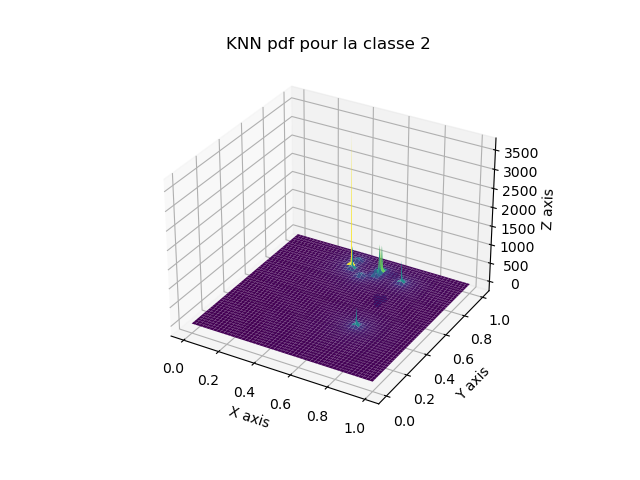

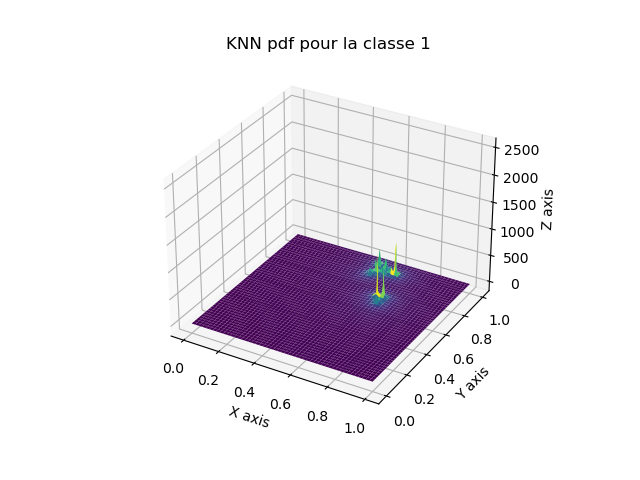

In [90]:
# Affichage pdf estimation 
def plotpdf(pdf, Xdata, x_min=-1, x_max=1, y_min=-1, y_max=1, res=300, title = 'KNN pdf'):
    #Create grid and multivariate KNN estimation
    x = np.linspace(x_min,x_max,res)
    y = np.linspace(y_min,y_max,res)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    
    # Distances
    distances, indices = pdf.kneighbors(np.transpose(np.array([X.flatten(),Y.flatten()])))
    distances = np.mean(distances,axis=1)
    distances = distances.reshape(X.shape[0],X.shape[1])

    #Make a 3D plot    
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) 
    ax.plot_surface(X, Y, 1 / distances ,cmap='viridis',linewidth=0)
    ax.scatter(Xdata[:,0],Xdata[:,1])
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.set_title(title)
    
plotpdf(knn1, X1,x_min=0, y_min=0, title='KNN pdf pour la classe 1')
plt.plot
plotpdf(knn2, X1,x_min=0, y_min=0, title='KNN pdf pour la classe 2')
plt.show()

## 2.b)  Classification par KNN

KNN est très utilisé pour des problèmes de classification. La distribution à postériori, à partir de la règle de Bayes peut être écrite à partir des échantillons de la manière suivante :
$$
p(c_i|{\bf x})=\cfrac{{p({\bf x}|c_i)}. P(c_i)}{\sum_{j=1}^m 
	p({\bf x}|c_j)P(c_j)}
\approx\cfrac{\cfrac{\frac{k_i}{n}}{V}}
{\sum_{j=1}^m\cfrac{\frac{k_i}{n}}{V}}
$$
et se simplifie par :
$$
p(c_i|{\bf x})\approx\cfrac{k_i}{k}
$$


+ Exécutez le code qui affiche la densité à postériori de la classe 1.
+ Changez le nombre de voisins et comparez les distributions à postériori résultantes.
+ Modifiez le code pour calculer l'erreur de classification sur la base de test. Vous pourrez utilisez la fonction `KneighborsClassifier`. 

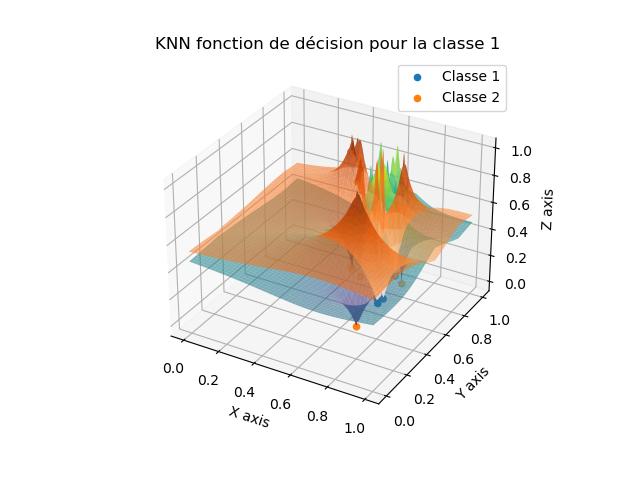

In [91]:
def plotKNNdistribution(knn1,knn2, Xdata1, Xdata2,x_min=-1, x_max=1, y_min=-1, y_max=1, res=300\
             , title = 'KNN fonction de décision pour la classe 1'):
    #Create grid and multivariate KDE estimation
    x = np.linspace(x_min,x_max,res)
    y = np.linspace(y_min,y_max,res)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
    
    distances1, indices = knn1.kneighbors(np.transpose(np.array([X.flatten(),Y.flatten()])))
    distances1 = np.mean(distances1,axis=1)
    distances1 = distances1.reshape(X.shape[0],X.shape[1])
    distances2, indices = knn2.kneighbors(np.transpose(np.array([X.flatten(),Y.flatten()])))
    distances2 = np.mean(distances2,axis=1)
    distances2 = distances2.reshape(X.shape[0],X.shape[1])
 
    #Make a 3D plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    ax.plot_surface(X, Y, \
        (1/distances1)/(1/distances1+1/distances2),\
        cmap='viridis',linewidth=0,vmin=0,vmax=1, alpha = 0.6)
    
    ax.plot_surface(X, Y, \
        (1/distances2)/(1/distances1+1/distances2),\
        cmap='Oranges',linewidth=0,vmin=0,vmax=1, alpha = 0.6)
    
    ax.scatter(Xdata1[:,0],Xdata1[:,1],label='Classe 1')
    ax.scatter(Xdata2[:,0],Xdata2[:,1],label='Classe 2')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    ax.legend()
    ax.set_title(title)

plotKNNdistribution(knn1,knn2,X1,X2,x_min=0, y_min=0)

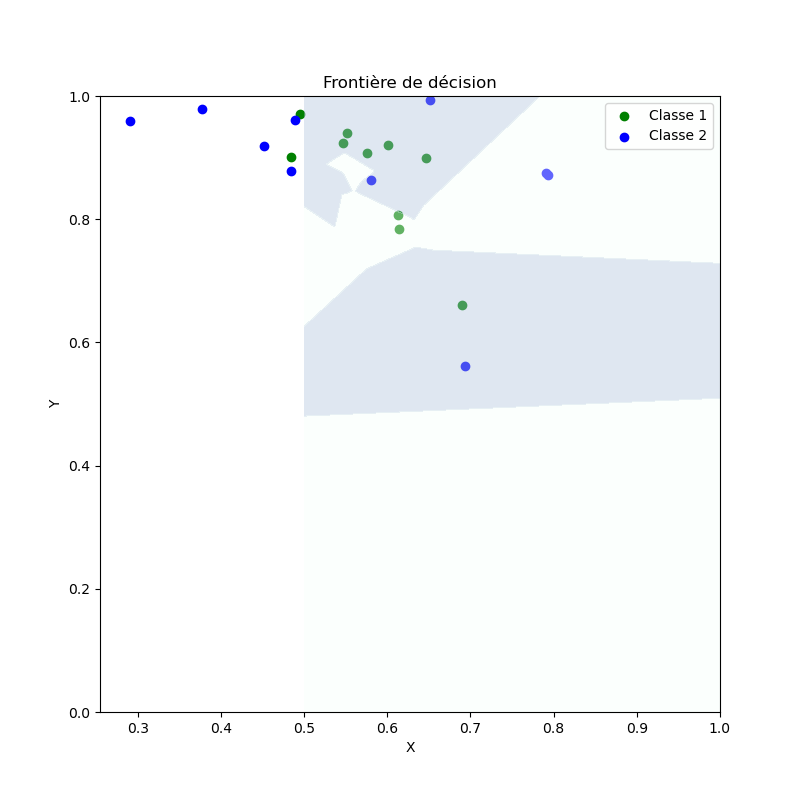

In [92]:
# plot KDE based decision function 
def plotKNNdecision(knn1,knn2, Xdata1, Xdata2,x_min=-1, x_max=1, y_min=-1, y_max=1, res=300, title = 'Frontière de décision'):
    #Create grid and multivariate KDE estimation
    x = np.linspace(x_min,x_max,res)
    y = np.linspace(y_min,y_max,res)
    X, Y = np.meshgrid(x,y)
    pos = np.empty(X.shape + (2,))
    pos[:, :, 0] = X; pos[:, :, 1] = Y
  
    
    distances1, indices = knn1.kneighbors(np.transpose(np.array([X.flatten(),Y.flatten()])))
    distances1 = np.mean(distances1,axis=1)
    distances1 = distances1.reshape(X.shape[0],X.shape[1])
    distances2, indices = knn2.kneighbors(np.transpose(np.array([X.flatten(),Y.flatten()])))
    distances2 = np.mean(distances2,axis=1)
    distances2 = distances2.reshape(X.shape[0],X.shape[1])
    
    
    fig, ax = plt.subplots(figsize=(8,8))   
    ax.scatter(Xdata1[:,0],Xdata1[:,1],c='g', label='Classe 1')
    ax.scatter(Xdata2[:,0],Xdata2[:,1],c='b', label='Classe 2')
    
    Z=distances1-distances2
    
    ax.contourf(X, Y, Z, levels=[-10., 0, 10.], colors = ['lightsteelblue','mintcream'], alpha=.4)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    ax.legend()
    ax.set_title(title)
    
# Appel de la fonction  
plotKNNdecision(knn1,knn2,Xtest1,Xtest2,x_min=0.5, y_min=0)

In [93]:
# KNearestNeighbors Classifier
#Compléter
clf = KNeighborsClassifier(k)

Xtrain = np.concatenate([X1,X2])
Ytrain = np.ones(20)
Ytrain[10:] = 2

clf.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=2)

In [94]:
Xtest = np.concatenate([Xtest1,Xtest2])
Ytest = np.ones(20)
Ytest[10:] = 2
clf.score(Xtest, Ytest)

0.6

### A Faire :

Reprendre l'exercice avec le dataset2 et essayez d'obtenir les meilleurs résultats possibles sur ce dataset